In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas ayarlarını genişletme
pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_rows', None) 

# 1. 📦 VERİ ÖN İŞLEME

## 1.1 Veri Genel Bilgisi ve Türleri

In [2]:
df = pd.read_csv(r"C:\Users\90535\Desktop\Ali Murat\datas\benim verim\2010-2019 Fall Marathons_Results.csv")

In [3]:
df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053366 entries, 0 to 2053365
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Race         object
 1   Year         int64 
 2   Name         object
 3   Gender       object
 4   Age          int64 
 5   Finish       int64 
 6   Age Bracket  object
dtypes: int64(3), object(4)
memory usage: 109.7+ MB


In [5]:
df.describe().round(3)

,Year,Age,Finish
count,2053366.000,2053366.000,2053366.000
mean,2014.416,39.193,16517.795
std,2.833,12.079,3366.605
min,2010.000,-9.000,7425.000
25%,2012.000,31.000,14080.000
50%,2014.000,39.000,16135.000
75%,2017.000,48.000,18553.000
max,2019.000,116.000,73460.000


## 1.2 Eksik Değer Analizi ve Temizleme

In [6]:
# Eksik değer kontrolü
print("\n💡 Eksik Değerler:\n", df.isnull().sum())


💡 Eksik Değerler:
 Race           0
Year           0
Name           2
Gender         8
Age            0
Finish         0
Age Bracket    0
dtype: int64


In [7]:
# Eksik ve gereksiz verileri ineceleme
df["Age"].unique()

array([ 29,  27,  26,  28,  44,  24,  25,  36,  22,  45,  61,  57,  37,
        49,  31,  35,  30,  21,  23,  38,  18,  59,  34,  20,  32,  42,
        33,  48,  19,  46,  40,  51,  41,  50,  47,  43,  39,  66,  53,
        54,  16,  62,  58,  56,  55,  72,  65,  60,  52,  71,  64,  -1,
        63,  69,  67,  73,  70,  14,  74,  68,  76,  79,  78,  84,  99,
        17,  11,  15,  75,  77,  13,  90,  80,  98,   9,  81,  12,  10,
        82,  83,   5,  86,   1,  85,   8,  88,  91, 116,  87,  89,   0,
         6,  94,   2,   7,  -9], dtype=int64)

In [8]:
# Genel maraton katılımcıları yaş aralığı araştırmasına dayanarak: 
# Yaş sınırlarını belirleyelim: 
min_age = 13 
max_age = 100 

# Yaşı 13'ten küçük veya 100'den büyük olan katılımcıların yaşlarını NaN (eksik değer) olarak ayarlıyoruz
df.loc[(df['Age'] < min_age) | (df['Age'] > max_age), 'Age'] = np.nan

In [9]:
# Name sütununda eksik verileri 'Unknown' ile doldur
df['Name'] = df['Name'].fillna('Unknown')

# "Gender" sütunundaki boş değerleri, en sık görülen değer (mode) ile doldur
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# 'Under 35' yaş grubunun medyan değeri
under_35_age_median = df[df['Age Bracket'] == 'Under 35']['Age'].median()

# '80 and Over' yaş grubunun medyan değeri
over_80_age_median = df[df['Age Bracket'] == '80 and Over']['Age'].median()

# NaN olan 'Age' değerlerini yaş aralıklarına göre medyan değerler ile dolduruyoruz
df.loc[(df['Age'].isnull()) & (df['Age Bracket'] == 'Under 35'), 'Age'] = under_35_age_median
df.loc[(df['Age'].isnull()) & (df['Age Bracket'] == '80 and Over'), 'Age'] = over_80_age_median

## 1.3 Uç Değer (Outlier) Analizi

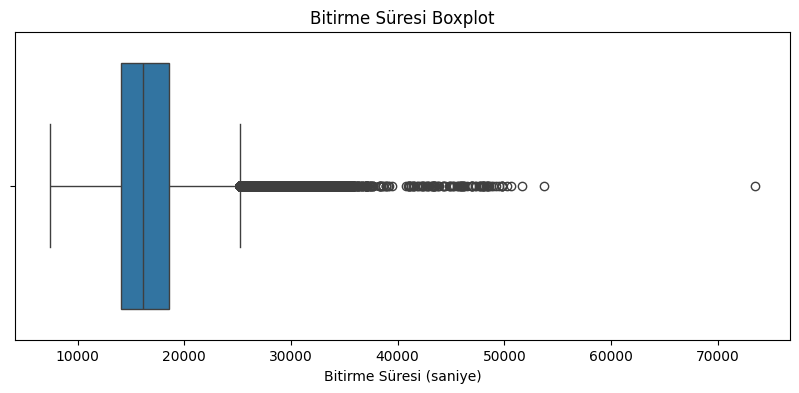

In [10]:
# Finish süresi boxplot ile görselleştirme
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Finish')
plt.title("Bitirme Süresi Boxplot")
plt.xlabel("Bitirme Süresi (saniye)")
plt.show()

Makine öğrenmesi modellerinde uç değerlerin tahminleri olumsuz etkileyebileceği göz önünde bulundurularak, aykırı değerler çıkarma ve Winsorize yöntemiyle düzeltilmiş varyasyonlar oluşturulmuştur.

In [11]:
# Aykırı değerlerin IQR yöntemi ile tespiti
Q1 = df['Finish'].quantile(0.25)
Q3 = df['Finish'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Finish'] < lower_bound) | (df['Finish'] > upper_bound)]
print("Aykırı değer sayısı:", len(outliers))

Aykırı değer sayısı: 24148


In [12]:
# Aykırı değerleri çıkarma
df_cleaned = df[(df['Finish'] >= lower_bound) & (df['Finish'] <= upper_bound)]

# Aykırı değerleri gözden geçirme
print(f"Orijinal ortalama: {df['Finish'].mean():.2f}")
print(f"Ortalama bitirme süresi (temizlenmiş veri): {df_cleaned['Finish'].mean() : .2F}")

Orijinal ortalama: 16517.80
Ortalama bitirme süresi (temizlenmiş veri):  16393.63


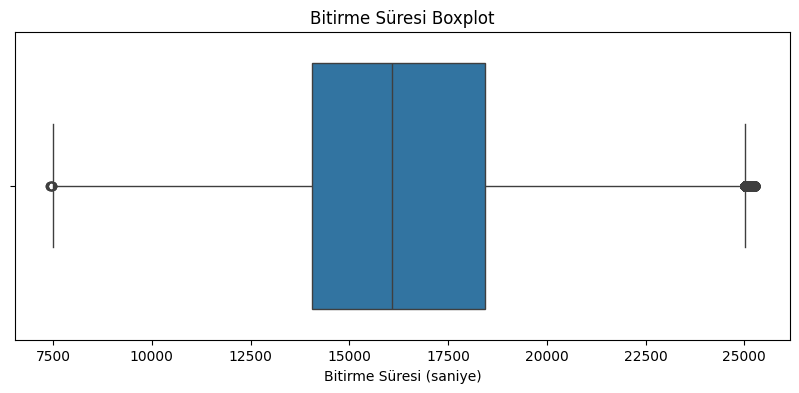

In [13]:
# Aykırı değerleri çıkarma Yöntemi ile Bitirme Süresi(Finish) Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_cleaned, x='Finish')
plt.title("Bitirme Süresi Boxplot")
plt.xlabel("Bitirme Süresi (saniye)")
plt.show()

In [14]:
# Winsorizing: alt sınırdan küçükleri alt sınıra, üst sınırdan büyükleri üst sınıra kırp
df_winsorized = df.copy()
df_winsorized['Finish'] = df_winsorized['Finish'].clip(lower=lower_bound, upper=upper_bound)

# Karşılaştırma
print(f"Orijinal ortalama: {df['Finish'].mean():.2f}")
print(f"Winsorized ortalama (kırpma): {df_winsorized['Finish'].mean():.2f}")

Orijinal ortalama: 16517.80
Winsorized ortalama (kırpma): 16497.93


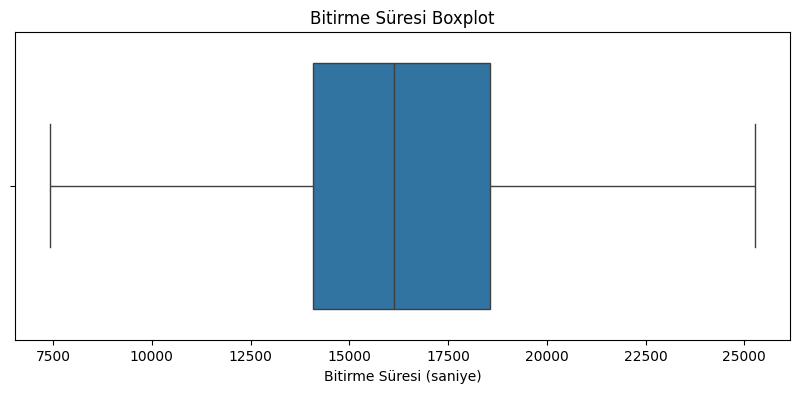

In [15]:
# Winsorizing Yöntemi ile Bitirme Süresi(Finish) Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_winsorized, x='Finish')
plt.title("Bitirme Süresi Boxplot")
plt.xlabel("Bitirme Süresi (saniye)")
plt.show()


--- İstatistiksel Karşılaştırmalar ---
Orijinal Ortalama: 16517.80
Temizlenmiş Ortalama: 16393.63
Winsorized Ortalama: 16497.93


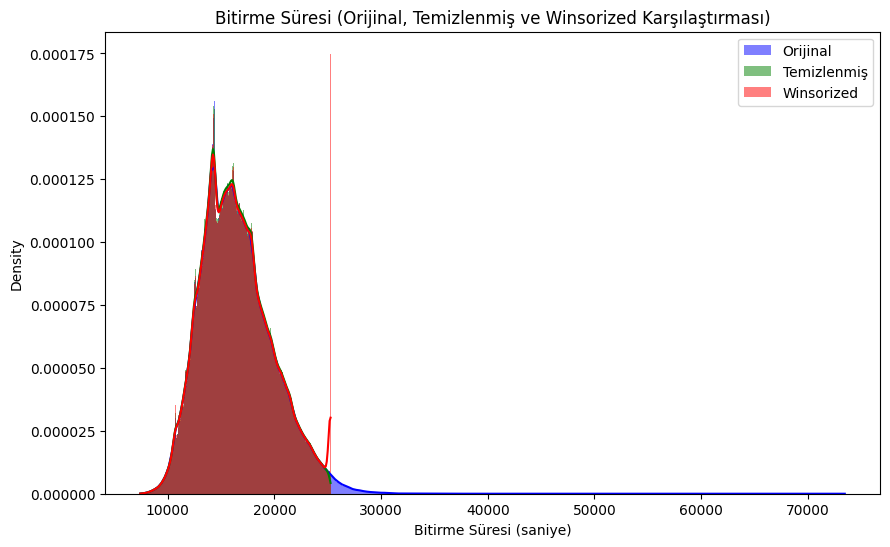

In [16]:
# SONUÇLARIN KIYASLANMASI VE İLERİ ADIMLAR
# İstatistiksel karşılaştırma: Orijinal, temizlenmiş ve Winsorized veri arasındaki farkları gözlemleme
print("\n--- İstatistiksel Karşılaştırmalar ---")
print(f"Orijinal Ortalama: {df['Finish'].mean():.2f}")
print(f"Temizlenmiş Ortalama: {df_cleaned['Finish'].mean():.2f}")
print(f"Winsorized Ortalama: {df_winsorized['Finish'].mean():.2f}")

# Veriyi görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(df['Finish'], kde=True, color='blue', label='Orijinal', stat='density', linewidth=0)
sns.histplot(df_cleaned['Finish'], kde=True, color='green', label='Temizlenmiş', stat='density', linewidth=0)
sns.histplot(df_winsorized['Finish'], kde=True, color='red', label='Winsorized', stat='density', linewidth=0)
plt.title("Bitirme Süresi (Orijinal, Temizlenmiş ve Winsorized Karşılaştırması)")
plt.xlabel("Bitirme Süresi (saniye)")
plt.legend()
plt.show()

# 2. 📊 KEŞİFSEL VERİ ANALİZİ (EDA)

## 2.1 DAĞILIM GÖRSELLEŞTİRMELERİ

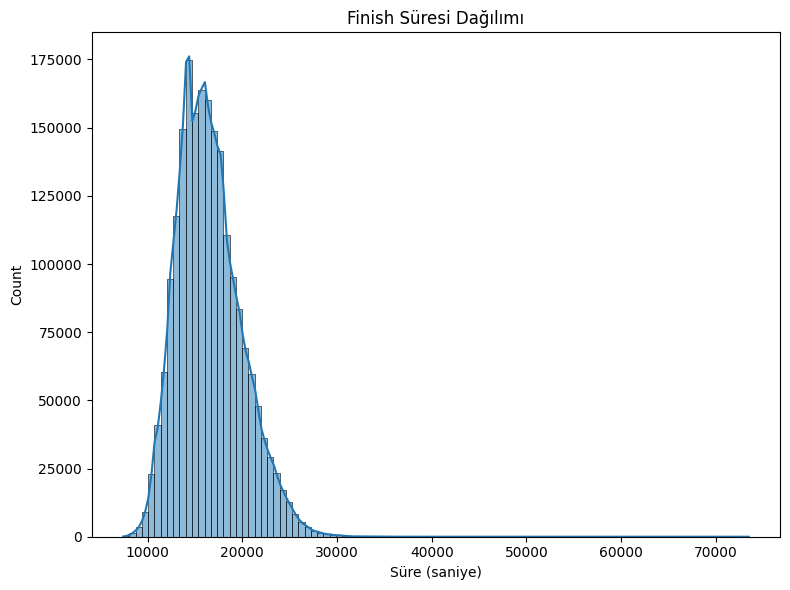

In [17]:
# 2.1.1 Finish Süresi Dağılımı
plt.figure(figsize=(8,6))
sns.histplot(df["Finish"], bins=100, kde=True)
plt.title("Finish Süresi Dağılımı")
plt.xlabel("Süre (saniye)")
plt.tight_layout()
plt.show()

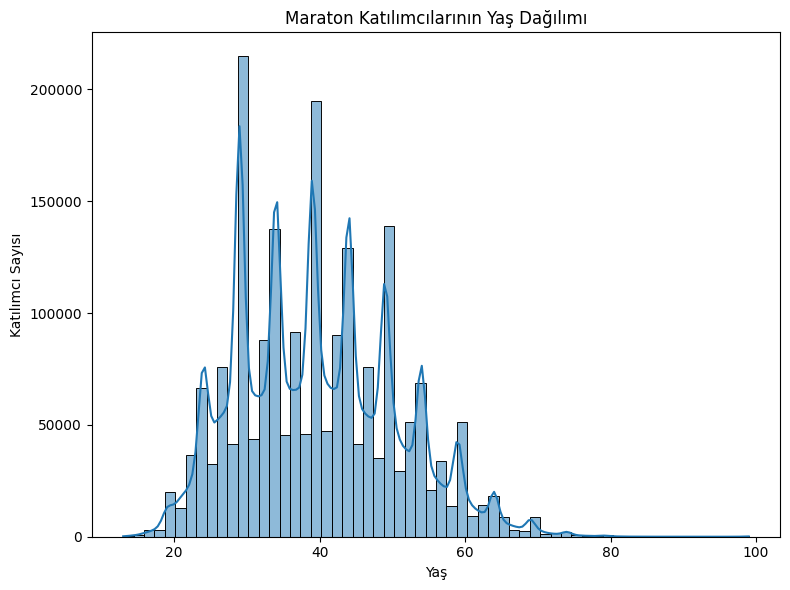

In [18]:
# 2.1.2 Yaş Dağılımı
plt.figure(figsize=(8,6))
sns.histplot(df["Age"], bins=60, kde=True)
plt.title("Maraton Katılımcılarının Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Katılımcı Sayısı")
plt.tight_layout()
plt.show()

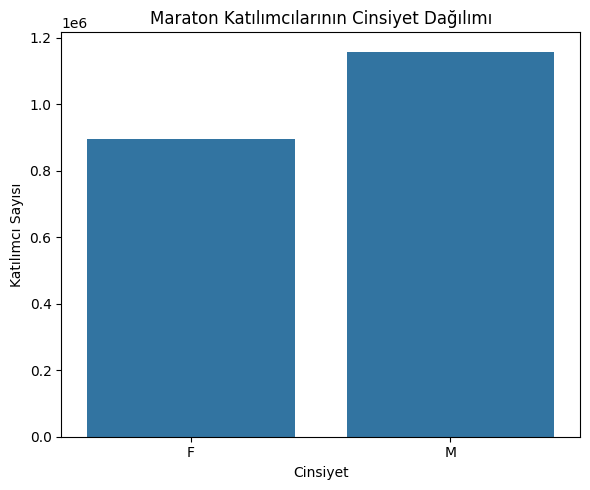

In [19]:
# 2.1.3 Cinsiyet Dağılımı
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Gender")
plt.title("Maraton Katılımcılarının Cinsiyet Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Katılımcı Sayısı")
plt.tight_layout()
plt.show()

## 2.2 BİTİRME SÜRESİ ANALİZLERİ

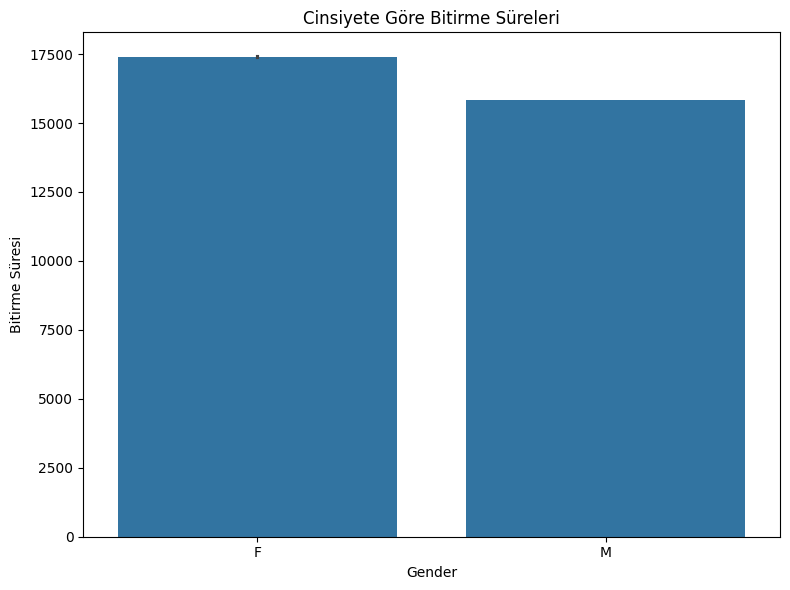

In [20]:
# 2.2.1 Cinsiyete Göre Ortalama Bitirme Süresi
plt.figure(figsize=(8, 6))
sns.barplot(x="Gender", y="Finish", data=df)
plt.title("Cinsiyete Göre Bitirme Süreleri")
plt.ylabel("Bitirme Süresi")
plt.tight_layout()
plt.show()

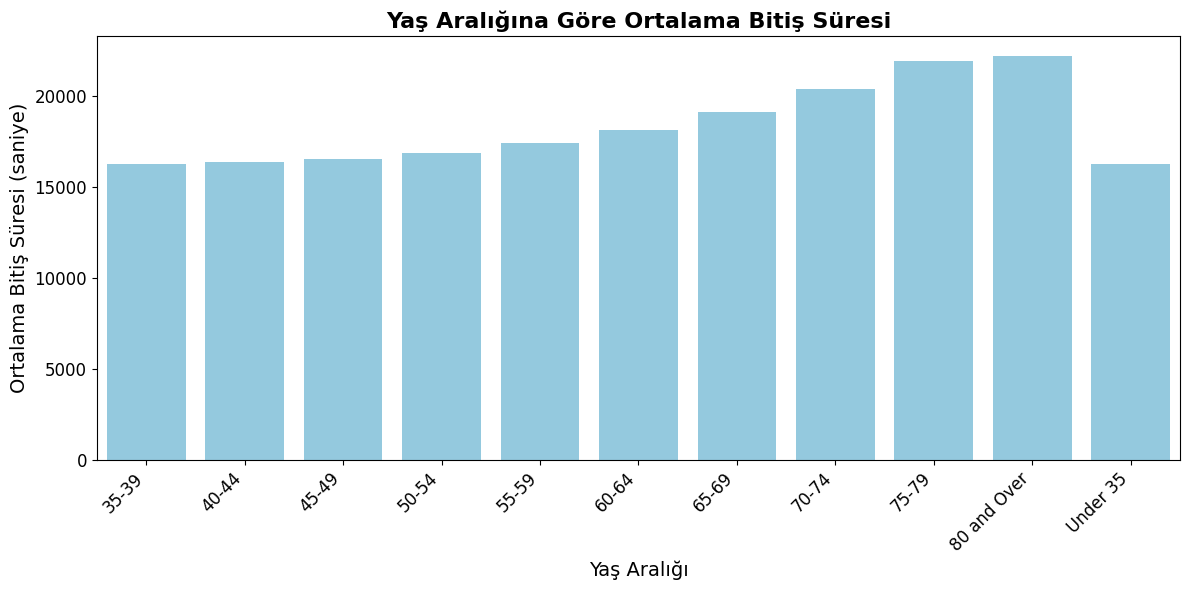

In [21]:
# 2.2.2 Yaş Aralığına Göre Ortalama Bitirme Süresi
plt.figure(figsize=(12, 6))
grouped_Age_Bracket = df.groupby("Age Bracket")["Finish"].mean().reset_index()
sns.barplot(x="Age Bracket", y="Finish", data=grouped_Age_Bracket, color='skyblue')
plt.title("Yaş Aralığına Göre Ortalama Bitiş Süresi", fontsize=16, weight='bold')
plt.xlabel("Yaş Aralığı", fontsize=14)
plt.ylabel("Ortalama Bitiş Süresi (saniye)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

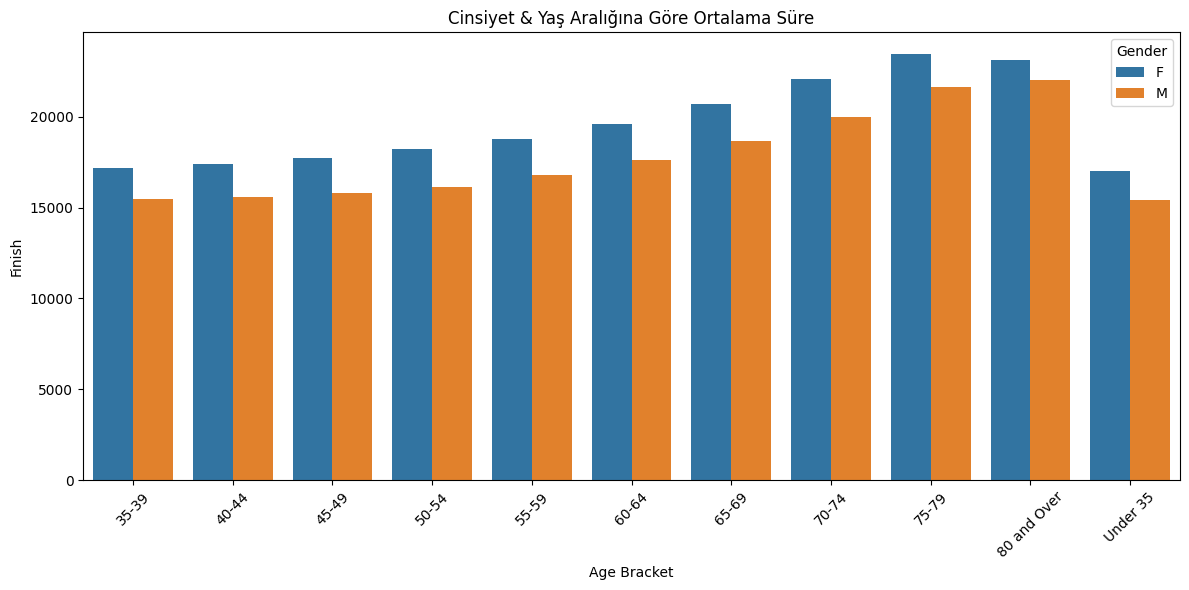

In [22]:
# 2.2.3 Cinsiyet ve Yaş Aralığına Göre Ortalama Süre
plt.figure(figsize=(12,6))
grouped = df.groupby(["Age Bracket", "Gender"])["Finish"].mean().reset_index()
sns.barplot(x="Age Bracket", y="Finish", hue="Gender", data=grouped)
plt.title("Cinsiyet & Yaş Aralığına Göre Ortalama Süre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.3 ZAMAN SERİSİ İNCELEMELERİ

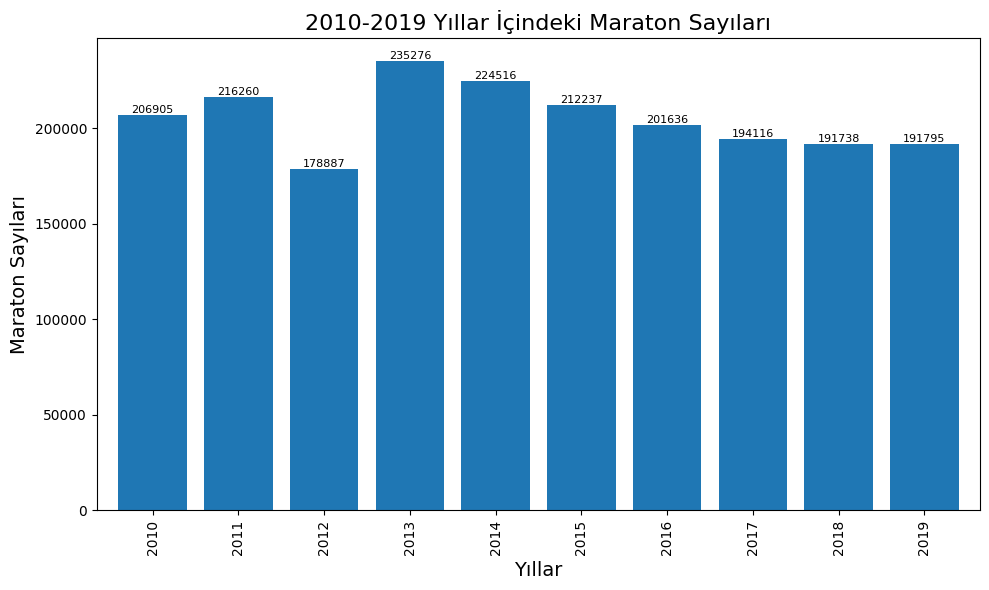

In [23]:
# 2.3.1 Yıllara Göre Katılımcı Sayısı
yearly_race_counts = df.groupby("Year")["Race"].count()
yearly_race_counts.plot(kind="bar", figsize=(10, 6), colormap="tab20", width=0.8)
plt.title("2010-2019 Yıllar İçindeki Maraton Sayıları", fontsize=16)
plt.xlabel("Yıllar", fontsize=14)
plt.ylabel("Maraton Sayıları", fontsize=14)
for i, value in enumerate(yearly_race_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

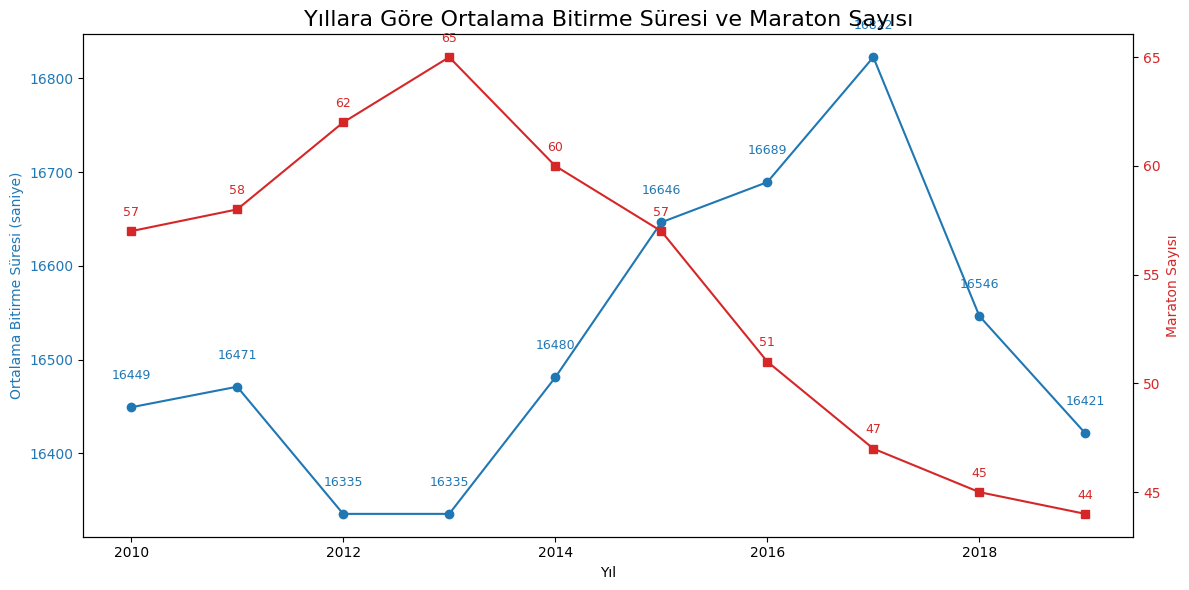

In [24]:
# 2.3.2 Yıllara Göre Ortalama Bitirme Süresi
finish_year = df.groupby("Year")["Finish"].mean()
# 2.3.3 Yıllara Göre Yarış Sayısı
marathon_count_per_year = df.groupby("Year")["Race"].nunique()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Ortalama bitirme süresi (sol eksen)
ax1.plot(finish_year.index, finish_year.values, color='tab:blue', marker='o', label="Ortalama Bitirme Süresi")
ax1.set_xlabel("Yıl")
ax1.set_ylabel("Ortalama Bitirme Süresi (saniye)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
for x, y in zip(finish_year.index, finish_year.values):
    ax1.text(x, y + 30, f"{int(y)}", color='tab:blue', fontsize=9, ha='center')

# Maraton sayısı (sağ eksen)
ax2 = ax1.twinx()
ax2.plot(marathon_count_per_year.index, marathon_count_per_year.values, color='tab:red', marker='s', label="Maraton Sayısı")
ax2.set_ylabel("Maraton Sayısı", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
for x, y in zip(marathon_count_per_year.index, marathon_count_per_year.values):
    ax2.text(x, y + 0.7, f"{y}", color='tab:red', fontsize=9, ha='center')

plt.title("Yıllara Göre Ortalama Bitirme Süresi ve Maraton Sayısı", fontsize=16)
plt.tight_layout()
plt.show()


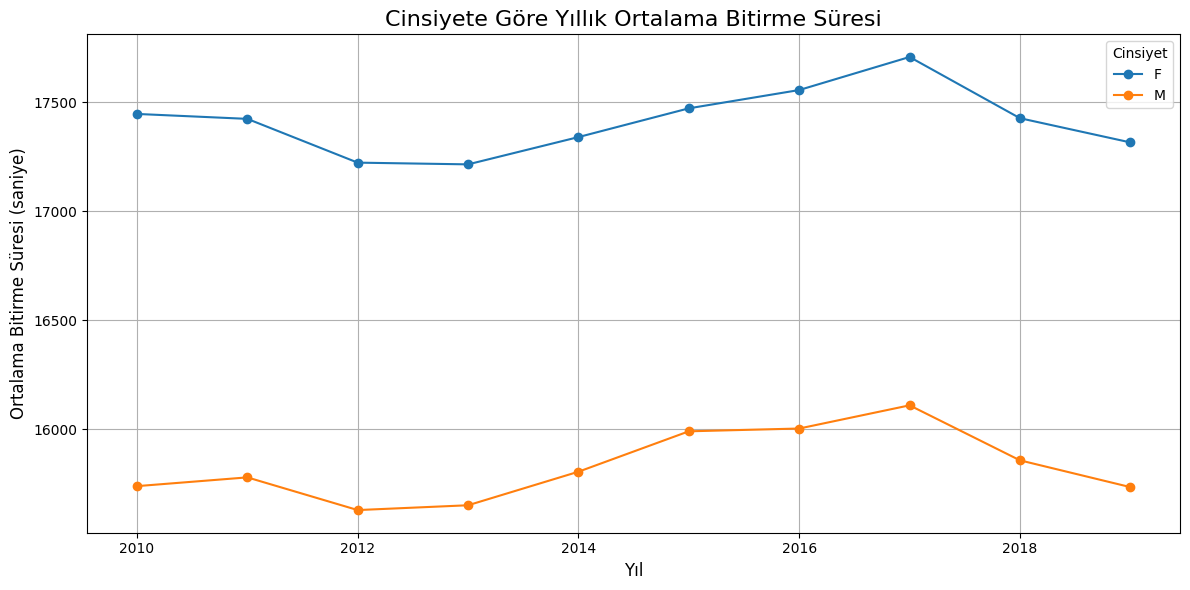

In [25]:
# 2.3.4 Cinsiyete Göre Yıllık Ortalama Bitirme Süresi
gender_finish_year = df.groupby(["Year", "Gender"])["Finish"].mean().unstack()
plt.figure(figsize=(12, 6))
gender_finish_year.plot(kind="line", marker='o', ax=plt.gca())
plt.title("Cinsiyete Göre Yıllık Ortalama Bitirme Süresi", fontsize=16)
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Ortalama Bitirme Süresi (saniye)", fontsize=12)
plt.legend(title="Cinsiyet")
plt.grid(True)
plt.tight_layout()
plt.show()

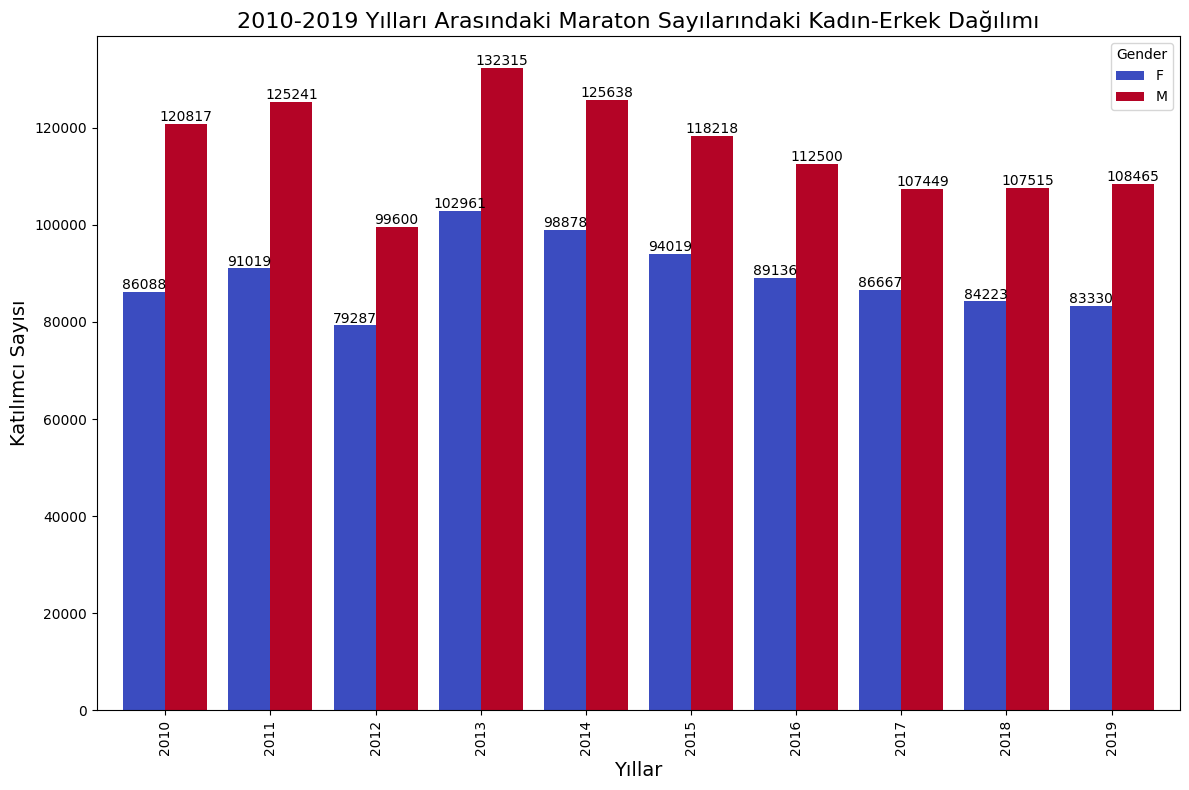

In [26]:
# 2.3.5 Yıl Bazında Cinsiyet Dağılımı
yearly_gender_distribution = df.groupby(["Year", "Gender"]).size().unstack(fill_value=0)
ax = yearly_gender_distribution.plot(kind="bar", figsize=(12, 8), colormap="coolwarm", width=0.8)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title("2010-2019 Yılları Arasındaki Maraton Sayılarındaki Kadın-Erkek Dağılımı", fontsize=16)
plt.xlabel("Yıllar", fontsize=14)
plt.ylabel("Katılımcı Sayısı", fontsize=14)
plt.tight_layout()
plt.show()

# 3. 🏁 YARIŞ BAZLI ANALİZLER

## 3.1 EN POPÜLER 10 YARIŞA GÖRE ORTALAMA SÜRE

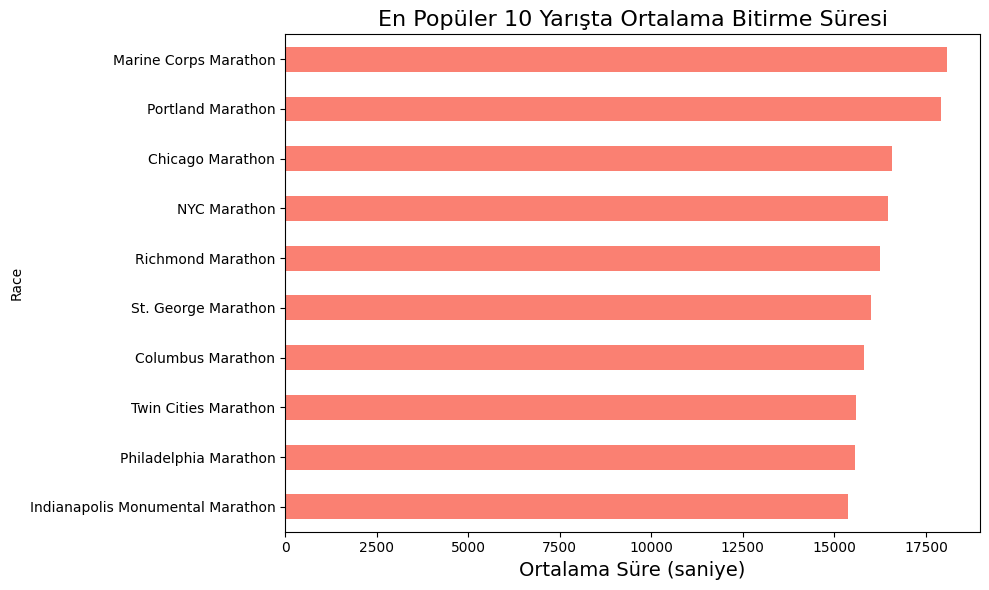

In [27]:
# En popüler 10 yarış
top_races = df["Race"].value_counts().head(10).index

# Bu yarışlar için ortalama bitirme süresi
top_race_perf = df[df["Race"].isin(top_races)].groupby("Race")["Finish"].mean().sort_values()

# Görselleştirme
plt.figure(figsize=(10, 6))
top_race_perf.plot(kind="barh", color="salmon")
plt.title("En Popüler 10 Yarışta Ortalama Bitirme Süresi", fontsize=16)
plt.xlabel("Ortalama Süre (saniye)", fontsize=14)
plt.tight_layout()
plt.show()

## 3.2 EN HIZLI VE EN YAVAŞ 3 YARIŞ

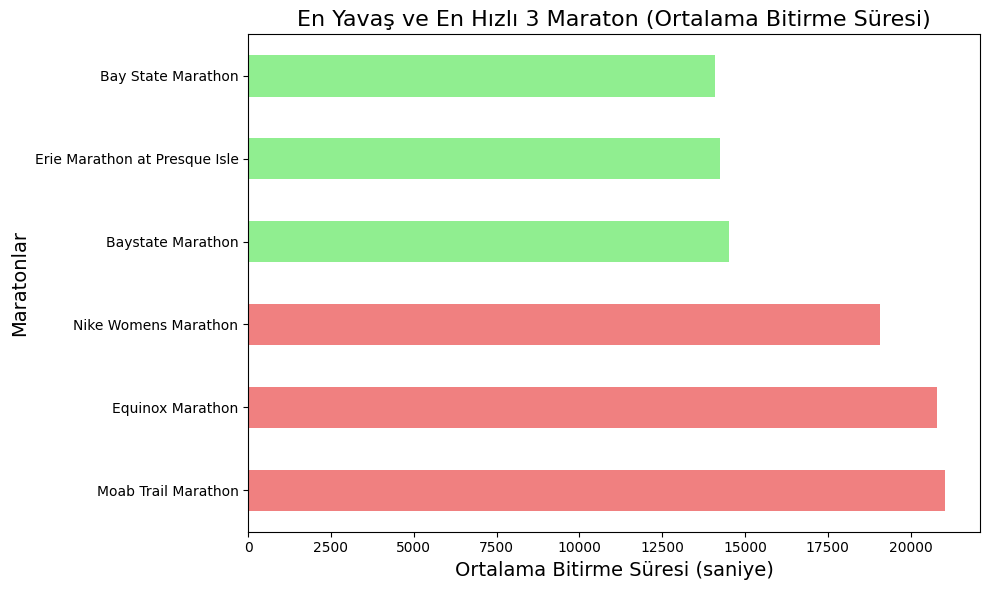

In [28]:
# Her bir maraton için ortalama bitirme süresi hesaplanıyor
finish_by_marathon = df.groupby("Race")["Finish"].mean()

# En hızlı 3 maraton (en düşük ortalama bitirme süresi)
fastest_marathons = finish_by_marathon.nsmallest(3)

# En yavaş 3 maraton (en yüksek ortalama bitirme süresi)
slowest_marathons = finish_by_marathon.nlargest(3)

# En hızlı ve en yavaş maratonları birleştirip, büyükten küçüğe sıralama
top_and_bottom_marathons = pd.concat([fastest_marathons, slowest_marathons]).sort_values(ascending=False)

# Grafik: En hızlı ve en yavaş maratonların görselleştirilmesi
plt.figure(figsize=(10, 6))
top_and_bottom_marathons.plot(kind='barh', color=['lightcoral']*3 + ['lightgreen']*3)
plt.title("En Yavaş ve En Hızlı 3 Maraton (Ortalama Bitirme Süresi)", fontsize=16)
plt.xlabel("Ortalama Bitirme Süresi (saniye)", fontsize=14)
plt.ylabel("Maratonlar", fontsize=14)
plt.tight_layout()
plt.show()

## 3.3 İlk 10 yarış için katılımcı sayısı

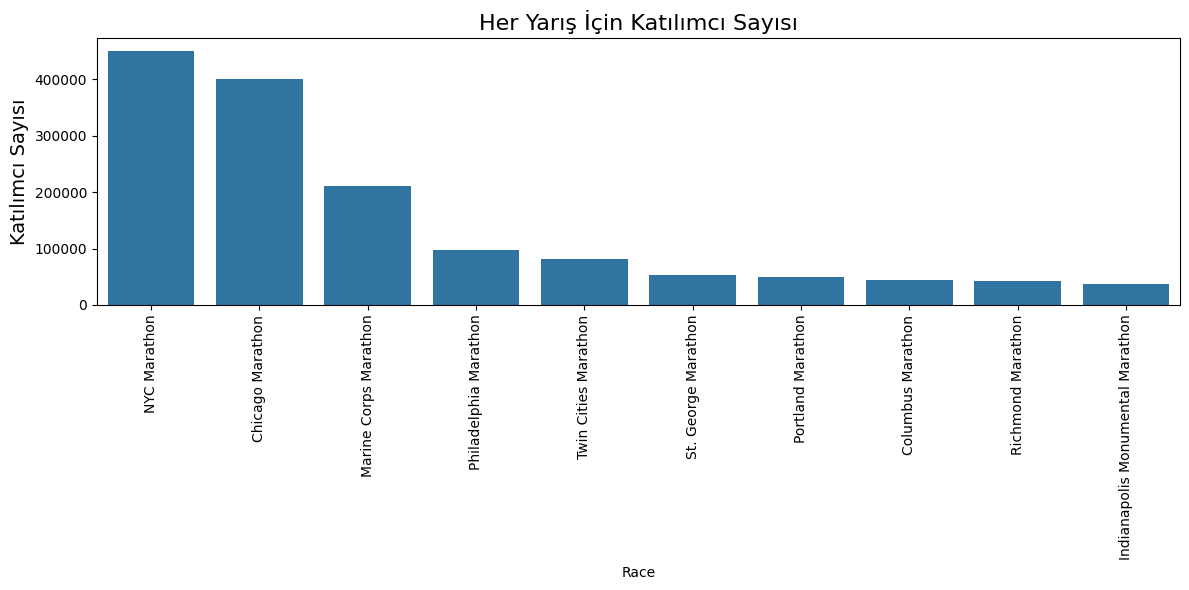

In [29]:
# İlk 10 yarış için katılımcı sayısı
race_participant_count = df['Race'].value_counts().reset_index().head(10)
race_participant_count.columns = ['Race', 'Participant Count']

# Görselleştirme: Katılımcı sayısının yarışlara göre dağılımı
plt.figure(figsize=(12, 6))
sns.barplot(x='Race', y='Participant Count', data=race_participant_count)
plt.xticks(rotation=90) 
plt.title('Her Yarış İçin Katılımcı Sayısı', fontsize=16)
plt.ylabel('Katılımcı Sayısı', fontsize=14)
plt.tight_layout()
plt.show()


## 3.4 En Popüler 10 Yarış İçin Cinsiyet Dağılımı

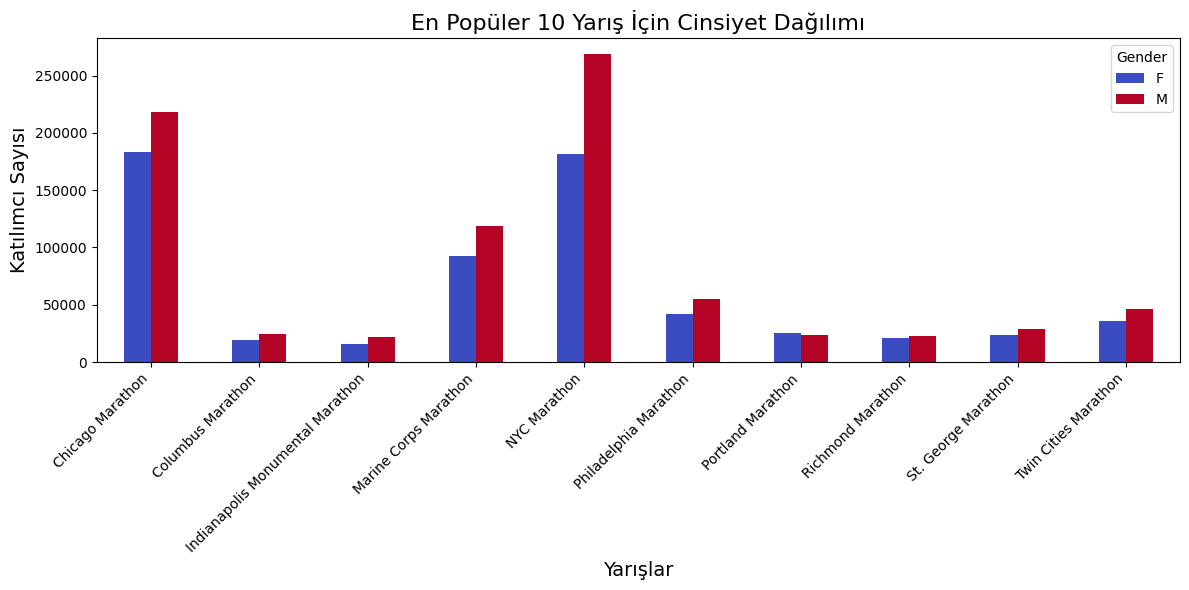

In [30]:
# En popüler 20 yarış
top_races = df["Race"].value_counts().head(10).index

# Bu yarışlar için cinsiyet dağılımı
gender_distribution_top_races = df[df["Race"].isin(top_races)].groupby(["Race", "Gender"]).size().unstack(fill_value=0)

# Görselleştirme: En popüler 10 yarış için cinsiyet dağılımı
gender_distribution_top_races.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title('En Popüler 10 Yarış İçin Cinsiyet Dağılımı', fontsize=16)
plt.xlabel('Yarışlar', fontsize=14)
plt.ylabel('Katılımcı Sayısı', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3.5 En popüler 10 yarış için yaş ortalaması

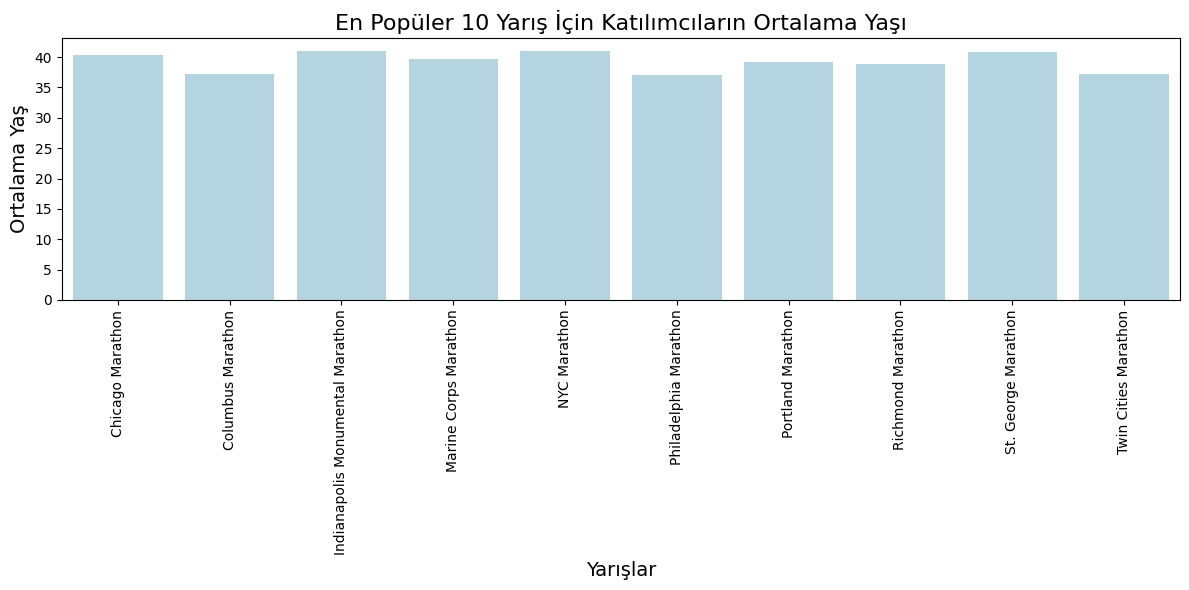

In [31]:
# Yaş dağılımını incelemek için her yarışın yaş ortalamasını hesaplayalım
age_by_race = df.groupby('Race')['Age'].mean().reset_index()

# En popüler 10 yarış için yaş ortalamalarını alalım
age_by_race_top = age_by_race[age_by_race['Race'].isin(top_races)]

# Görselleştirme: En popüler 10 yarış için yaş ortalaması
plt.figure(figsize=(12, 6))
sns.barplot(x='Race', y='Age', data=age_by_race_top, color='lightblue')
plt.xticks(rotation=90)  # Yarış isimlerinin görünmesi için döndürme
plt.title('En Popüler 10 Yarış İçin Katılımcıların Ortalama Yaşı', fontsize=16)
plt.xlabel('Yarışlar', fontsize=14)
plt.ylabel('Ortalama Yaş', fontsize=14)
plt.tight_layout()
plt.show()

## 3.6 En Hızlı ve En Yavaş Yarışların Yıllara Göre Değişimi

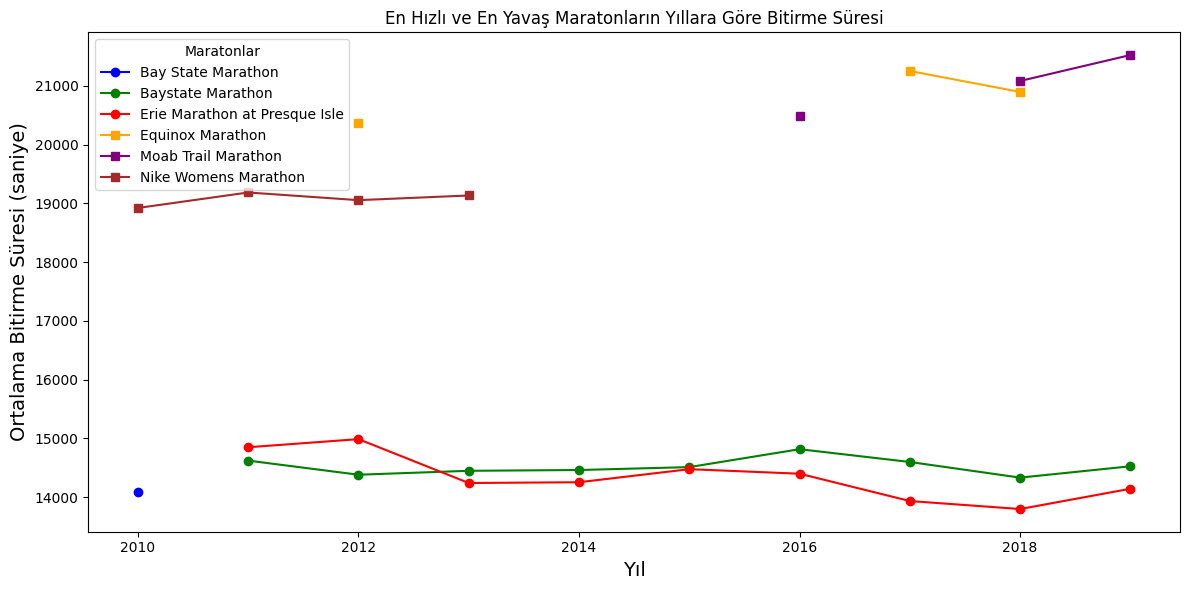

In [32]:
# En hızlı ve en yavaş maratonların yıllara göre bitirme sürelerini inceleyelim
fastest_marathons_yearly = df[df['Race'].isin(fastest_marathons.index)].groupby(['Year', 'Race'])['Finish'].mean().unstack()
slowest_marathons_yearly = df[df['Race'].isin(slowest_marathons.index)].groupby(['Year', 'Race'])['Finish'].mean().unstack()

# Görselleştirme: Yıllara göre en hızlı ve en yavaş yarışların değişimi
plt.figure(figsize=(12, 6))

# En hızlı maratonları çiziyoruz
fastest_marathons_yearly.plot(kind='line', marker='o', ax=plt.gca(), title='En Hızlı ve En Yavaş Maratonların Yıllara Göre Bitirme Süresi', color=['blue', 'green', 'red'])

# En yavaş maratonları çiziyoruz
slowest_marathons_yearly.plot(kind='line', marker='s', ax=plt.gca(), color=['orange', 'purple', 'brown'])

plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Ortalama Bitirme Süresi (saniye)', fontsize=14)
plt.legend(title="Maratonlar", loc='upper left')
plt.tight_layout()
plt.show()


# 4. 🎯 KOŞUCU PROFİLİ ANALİZLERİ

## 4.1 Elit ve Zayıf Performans Karşılaştırmaları

In [33]:
# En hızlı %1 ve en yavaş %1 analiz
lower_threshold = df["Finish"].quantile(0.01)
upper_threshold = df["Finish"].quantile(0.99)
print(f"\n⚡ En hızlı %1 ortalama süre: {df[df['Finish'] <= lower_threshold]['Finish'].mean():.2f} saniye")
print(f"🐢 En yavaş %1 ortalama süre: {df[df['Finish'] >= upper_threshold]['Finish'].mean():.2f} saniye")

# En hızlı %1 ve en yavaş %1 verilerini filtreleme
fastest_1_percent = df[df["Finish"] <= lower_threshold]
slowest_1_percent = df[df["Finish"] >= upper_threshold]


⚡ En hızlı %1 ortalama süre: 9687.59 saniye
🐢 En yavaş %1 ortalama süre: 27226.84 saniye


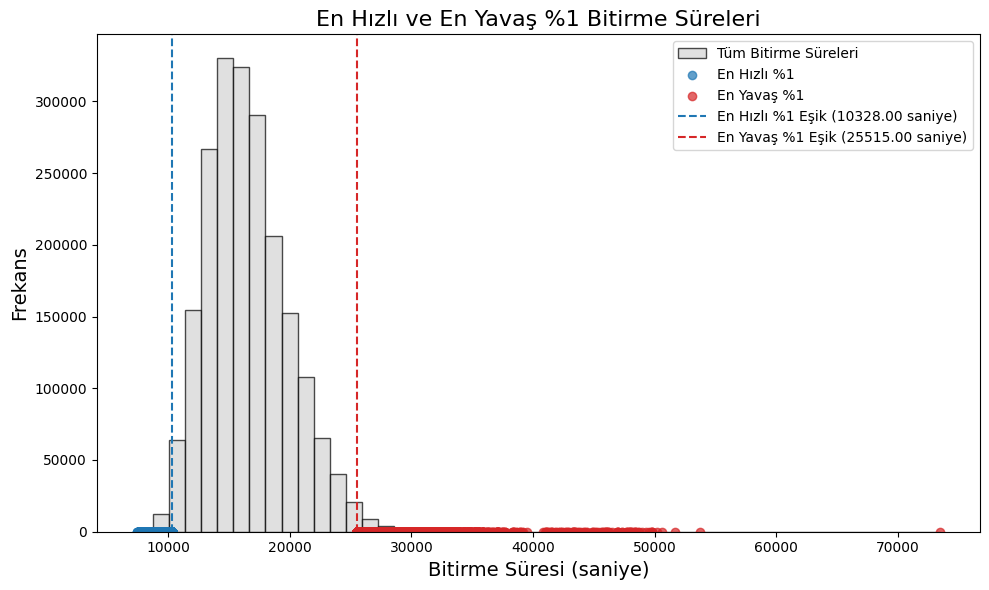

In [34]:
# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.hist(df["Finish"], bins=50, color='lightgray', edgecolor='black', alpha=0.7, label="Tüm Bitirme Süreleri")

# En hızlı %1 ve en yavaş %1 için işaretleme
plt.scatter(fastest_1_percent["Finish"], [1]*len(fastest_1_percent), color='tab:blue', label="En Hızlı %1", alpha=0.7)
plt.scatter(slowest_1_percent["Finish"], [1]*len(slowest_1_percent), color='tab:red', label="En Yavaş %1", alpha=0.7)

# Ortalama süreleri ekleme
plt.axvline(x=lower_threshold, color='tab:blue', linestyle='--', label=f'En Hızlı %1 Eşik ({lower_threshold:.2f} saniye)')
plt.axvline(x=upper_threshold, color='tab:red', linestyle='--', label=f'En Yavaş %1 Eşik ({upper_threshold:.2f} saniye)')

plt.title("En Hızlı ve En Yavaş %1 Bitirme Süreleri", fontsize=16)
plt.xlabel("Bitirme Süresi (saniye)", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


## 4.2 En Hızlı ve En Yavaş Koşucuların Yarış Bazında Performans Karşılaştırması

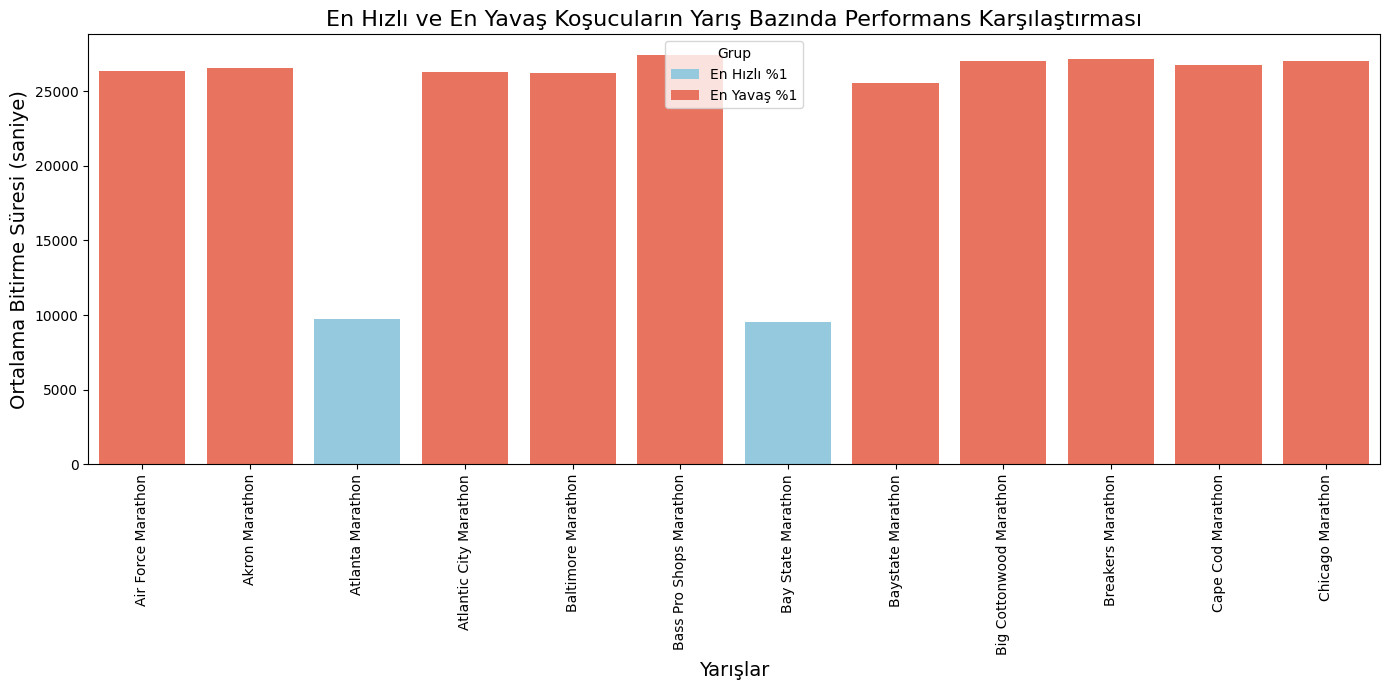

In [35]:
fastest_1_percent_race = fastest_1_percent.groupby('Race')['Finish'].mean().reset_index().head(10)
slowest_1_percent_race = slowest_1_percent.groupby('Race')['Finish'].mean().reset_index().head(10)

# Görselleştirme: En hızlı ve en yavaş koşucuların yarışlardaki performans farkları
plt.figure(figsize=(14, 7))

# En hızlı koşucuların yarışlardaki bitirme sürelerini çiziyoruz
sns.barplot(x='Race', y='Finish', data=fastest_1_percent_race, color='skyblue', label='En Hızlı %1')

# En yavaş koşucuların yarışlardaki bitirme sürelerini çiziyoruz
sns.barplot(x='Race', y='Finish', data=slowest_1_percent_race, color='tomato', label='En Yavaş %1')

plt.title('En Hızlı ve En Yavaş Koşucuların Yarış Bazında Performans Karşılaştırması', fontsize=16)
plt.xlabel('Yarışlar', fontsize=14)
plt.ylabel('Ortalama Bitirme Süresi (saniye)', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Grup')
plt.tight_layout()
plt.show()

## 4.3 Yaş ve Cinsiyete Göre En Hızlı %1 Koşucuların Performansı

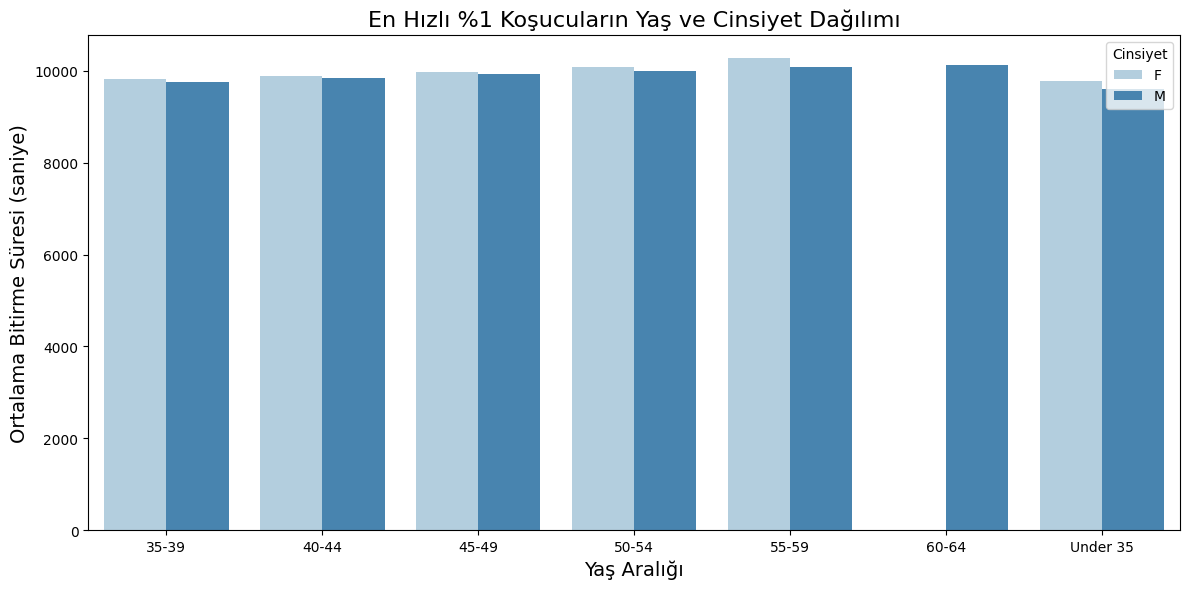

In [36]:
fastest_1_percent_age_gender = fastest_1_percent.groupby(['Age Bracket', 'Gender'])['Finish'].mean().reset_index()

# Görselleştirme: Yaş ve Cinsiyete Göre En Hızlı %1 Koşucuların Performansı
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Bracket', y='Finish', hue='Gender', data=fastest_1_percent_age_gender, palette='Blues')

plt.title('En Hızlı %1 Koşucuların Yaş ve Cinsiyet Dağılımı', fontsize=16)
plt.xlabel('Yaş Aralığı', fontsize=14)
plt.ylabel('Ortalama Bitirme Süresi (saniye)', fontsize=14)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

## 4.4 Yaş Gruplarına Göre En Yavaş %1 Koşucuların Performansı

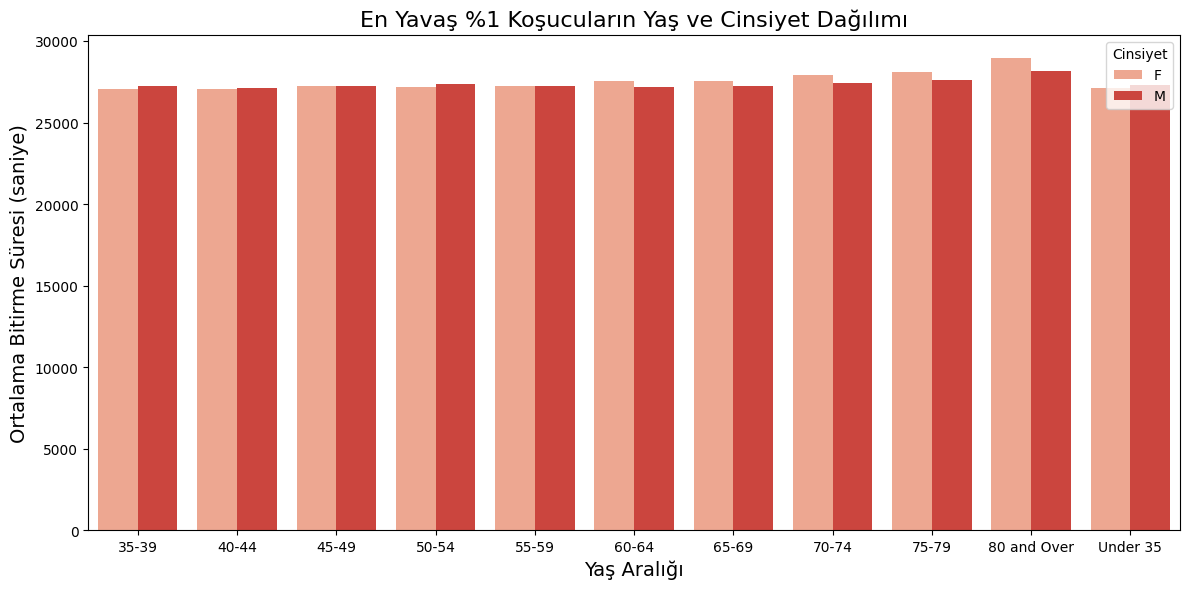

In [37]:
slowest_1_percent_age_gender = slowest_1_percent.groupby(['Age Bracket', 'Gender'])['Finish'].mean().reset_index()

# Görselleştirme: Yaş ve Cinsiyete Göre En Yavaş %1 Koşucuların Performansı
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Bracket', y='Finish', hue='Gender', data=slowest_1_percent_age_gender, palette='Reds')

plt.title('En Yavaş %1 Koşucuların Yaş ve Cinsiyet Dağılımı', fontsize=16)
plt.xlabel('Yaş Aralığı', fontsize=14)
plt.ylabel('Ortalama Bitirme Süresi (saniye)', fontsize=14)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

# 🎯 5. Korelasyon ve Etkileşim Analizleri

## 5.1 Aykırı Değerler ve Korelasyonlar

In [38]:
# Orijinal veri kümesinde Pearson ve Spearman Korelasyonları
pearson_corr = df['Age'].corr(df['Finish'], method='pearson')
spearman_corr = df['Age'].corr(df['Finish'], method='spearman')

print("Orijinal DataFrame (df):")
print(f"  Pearson Korelasyonu:  {pearson_corr:.3f}")
print(f"  Spearman Korelasyonu: {spearman_corr:.3f}\n")

# Aykırı değerlerin çıkarıldığı temizlenmiş veri kümesinde Korelasyonlar
pearson_corr_cleaned = df_cleaned['Age'].corr(df_cleaned['Finish'], method='pearson')
spearman_corr_cleaned = df_cleaned['Age'].corr(df_cleaned['Finish'], method='spearman')

print("Aykırı Değerler Çıkarılmış DataFrame (df_cleaned):")
print(f"  Pearson Korelasyonu:  {pearson_corr_cleaned:.3f}")
print(f"  Spearman Korelasyonu: {spearman_corr_cleaned:.3f}\n")

# Winsorizing yöntemi ile aykırı değerlerin sınırlandığı veri kümesinde Korelasyonlar
pearson_corr_winsorized = df_winsorized['Age'].corr(df_winsorized['Finish'], method='pearson')
spearman_corr_winsorized = df_winsorized['Age'].corr(df_winsorized['Finish'], method='spearman')

print("Winsorized DataFrame (df_winsorized):")
print(f"  Pearson Korelasyonu:  {pearson_corr_winsorized:.3f}")
print(f"  Spearman Korelasyonu: {spearman_corr_winsorized:.3f}\n")

Orijinal DataFrame (df):
  Pearson Korelasyonu:  0.132
  Spearman Korelasyonu: 0.102

Aykırı Değerler Çıkarılmış DataFrame (df_cleaned):
  Pearson Korelasyonu:  0.122
  Spearman Korelasyonu: 0.096

Winsorized DataFrame (df_winsorized):
  Pearson Korelasyonu:  0.132
  Spearman Korelasyonu: 0.102



## 5.2 Sayısal Sütunlar Arasındaki Korelasyon

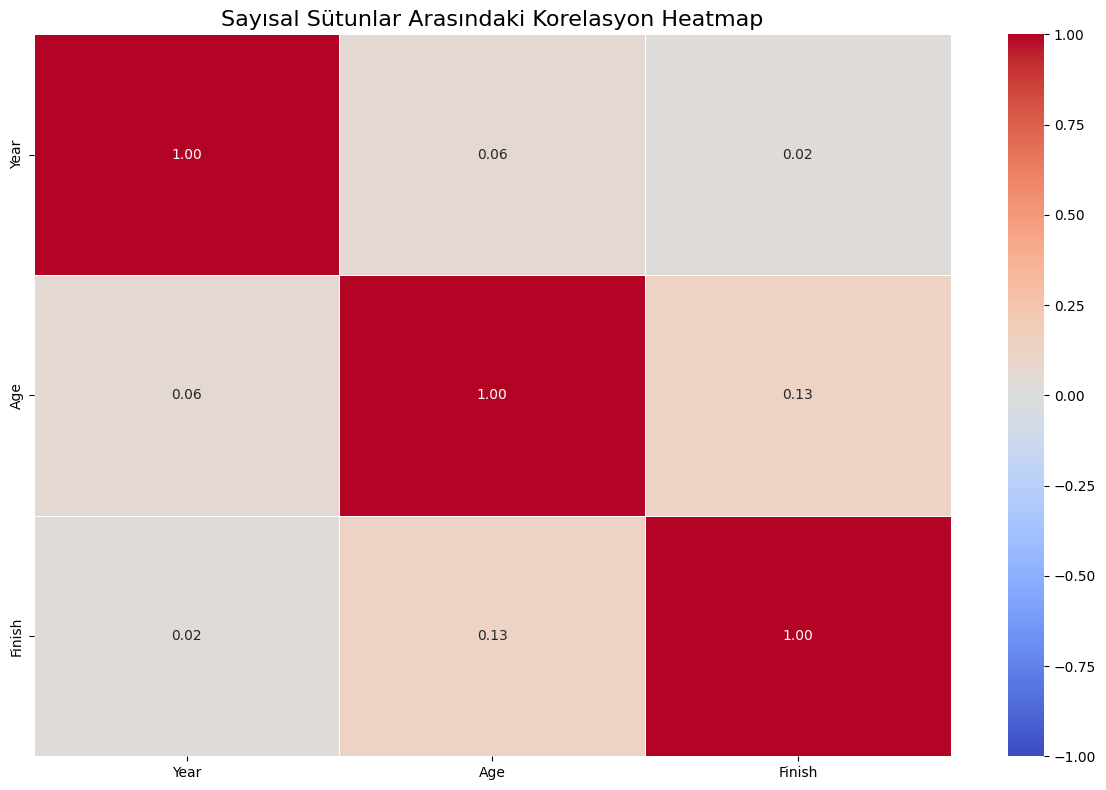

In [39]:
# Sayısal sütunlar arasındaki korelasyon matrisini hesaplama
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Korelasyon Heatmap Görselleştirmesi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Sayısal Sütunlar Arasındaki Korelasyon Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

## 5.3 Cinsiyetin Bitirme Süresi Üzerindeki Etkisi

In [40]:
from scipy.stats import f_oneway

# Cinsiyetin bitirme süresi üzerindeki etkisini incelemek için ANOVA testi
def gender_anova(dataframe, label):
    male_finish = dataframe[dataframe['Gender'] == 'M']['Finish']
    female_finish = dataframe[dataframe['Gender'] == 'F']['Finish']
    
    # ANOVA testi
    anova_result = f_oneway(male_finish, female_finish)
    
    print(f"{label} - Cinsiyetin Bitirme Süresi Üzerindeki Etkisi (ANOVA p-değeri): {anova_result.pvalue:.4f}")

# Her bir veri seti için testleri çalıştır
gender_anova(df, "Orijinal Veri (df)")
gender_anova(df_cleaned, "Aykırı Değerleri Çıkarılmış Veri (df_cleaned)")
gender_anova(df_winsorized, "Winsorized Veri (df_winsorized)")

Orijinal Veri (df) - Cinsiyetin Bitirme Süresi Üzerindeki Etkisi (ANOVA p-değeri): 0.0000
Aykırı Değerleri Çıkarılmış Veri (df_cleaned) - Cinsiyetin Bitirme Süresi Üzerindeki Etkisi (ANOVA p-değeri): 0.0000
Winsorized Veri (df_winsorized) - Cinsiyetin Bitirme Süresi Üzerindeki Etkisi (ANOVA p-değeri): 0.0000


## 5.4 Yaş Aralığının Bitirme Süresi Üzerindeki Etkisi

In [41]:
# Yaş aralıklarına göre bitirme süresi analizi için ANOVA testi
def age_bracket_anova(dataframe, label):
    age_brackets = dataframe['Age Bracket'].unique()
    age_grouped = [dataframe[dataframe['Age Bracket'] == age]['Finish'] for age in age_brackets]
    
    # ANOVA testi
    anova_result = f_oneway(*age_grouped)
    
    print(f"{label} - Yaş Aralığının Bitirme Süresi Üzerindeki Etkisi (ANOVA p-değeri): {anova_result.pvalue:.4f}")

# Her bir veri seti için çalıştır
age_bracket_anova(df, "Orijinal Veri (df)")
age_bracket_anova(df_cleaned, "Aykırı Değerleri Çıkarılmış Veri (df_cleaned)")
age_bracket_anova(df_winsorized, "Winsorized Veri (df_winsorized)")

Orijinal Veri (df) - Yaş Aralığının Bitirme Süresi Üzerindeki Etkisi (ANOVA p-değeri): 0.0000
Aykırı Değerleri Çıkarılmış Veri (df_cleaned) - Yaş Aralığının Bitirme Süresi Üzerindeki Etkisi (ANOVA p-değeri): 0.0000
Winsorized Veri (df_winsorized) - Yaş Aralığının Bitirme Süresi Üzerindeki Etkisi (ANOVA p-değeri): 0.0000


# 🎯 6. Kümelemenin Derinlemesine İncelenmesi

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 6.1 Orijinal Veri ile Kümeleme

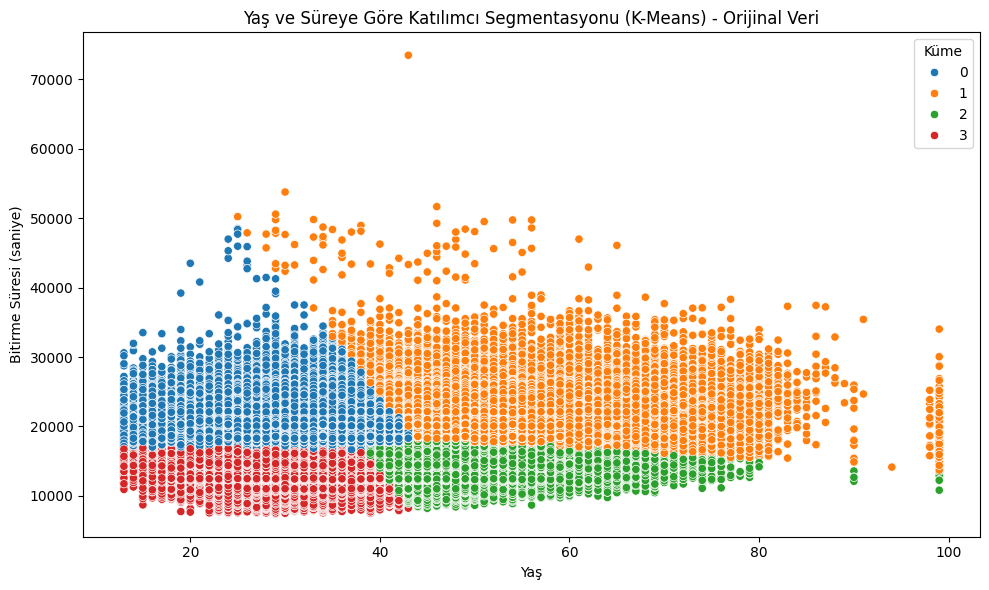

In [43]:
# Veriyi Seçme ve Ölçeklendirme
X_cluster = df[['Age', 'Finish']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# K-Means Modeli ve Kümeleme
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Görselleştirme: Orijinal Veri Kümeleme Sonuçları
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Finish', hue='cluster', palette='tab10')
plt.title("Yaş ve Süreye Göre Katılımcı Segmentasyonu (K-Means) - Orijinal Veri")
plt.xlabel("Yaş")
plt.ylabel("Bitirme Süresi (saniye)")
plt.legend(title='Küme', loc='upper right')
plt.tight_layout()
plt.show()

📊 Orijinal Veri Küme İstatistikleri:
            Age                   Finish                 
          mean median   count      mean   median   count
cluster                                                 
0        32.37   33.0  488980  19433.75  18901.0  488980
1        53.10   52.0  299820  20657.31  20136.0  299820
2        48.06   47.0  611091  14879.03  15023.0  611091
3        31.28   31.0  653475  13969.08  14155.0  653475
📊 Orijinal Veride Her Kümenin Cinsiyet Dağılımı:
 Gender        F       M
cluster                
0        294504  194476
1        141469  158351
2        193517  417574
3        266118  387357


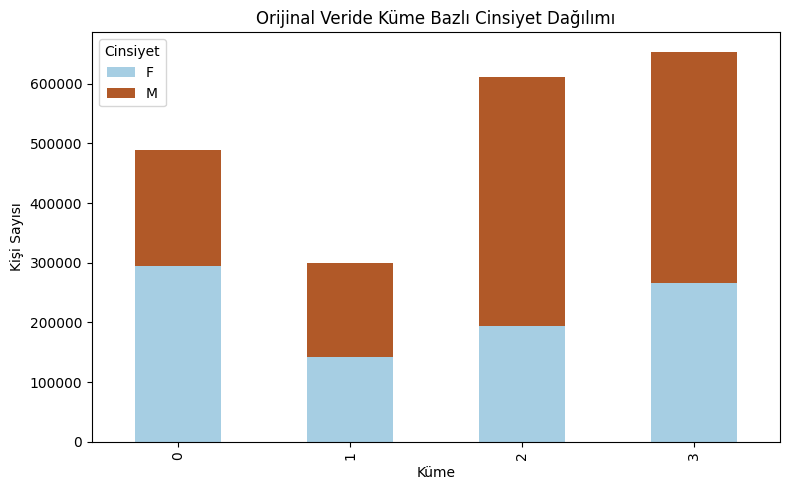

In [44]:
# Küme İstatistikleri: Orijinal Veri
cluster_summary = df.groupby('cluster')[['Age', 'Finish']].agg(['mean', 'median', 'count']).round(2)
print("📊 Orijinal Veri Küme İstatistikleri:\n", cluster_summary)

# Cinsiyet Dağılımı: Orijinal Veri
gender_dist_original = df.groupby(['cluster', 'Gender']).size().unstack()
print("📊 Orijinal Veride Her Kümenin Cinsiyet Dağılımı:\n", gender_dist_original)

# Cinsiyet Dağılımı Grafiği: Orijinal Veri
gender_dist_original.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')
plt.title("Orijinal Veride Küme Bazlı Cinsiyet Dağılımı")
plt.xlabel("Küme")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Cinsiyet")
plt.tight_layout()
plt.show()

## 6.2 Temizlenmiş Veri ile Kümeleme

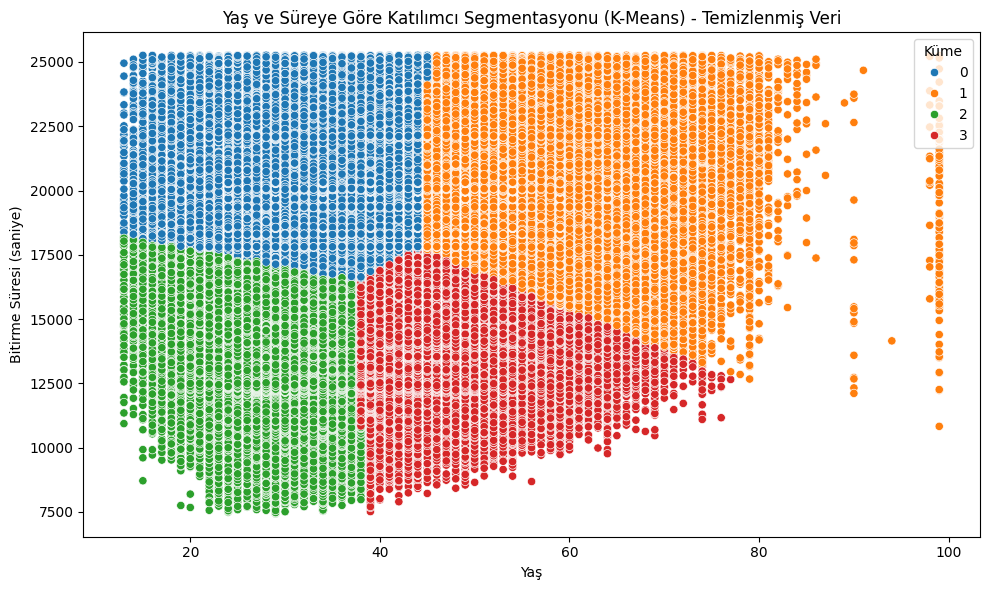

In [45]:
# Temizlenmiş Veriyi Seçme ve Ölçeklendirme
X_cluster_cleaned = df_cleaned[['Age', 'Finish']].copy()
X_scaled_cleaned = scaler.fit_transform(X_cluster_cleaned)

# K-Means Modeli ve Kümeleme
kmeans_cleaned = KMeans(n_clusters=4, random_state=42)
df_cleaned = df_cleaned.copy()  # .copy() kullanarak bir kopya alıyoruz
df_cleaned['cluster'] = kmeans_cleaned.fit_predict(X_scaled_cleaned)

# Görselleştirme: Temizlenmiş Veri Kümeleme Sonuçları
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Age', y='Finish', hue='cluster', palette='tab10')
plt.title("Yaş ve Süreye Göre Katılımcı Segmentasyonu (K-Means) - Temizlenmiş Veri")
plt.xlabel("Yaş")
plt.ylabel("Bitirme Süresi (saniye)")
plt.legend(title='Küme', loc='upper right')
plt.tight_layout()
plt.show()



📊 Temizlenmiş Veri Küme İstatistikleri:
            Age                   Finish                 
          mean median   count      mean   median   count
cluster                                                 
0        33.98   34.0  507458  19556.58  19122.0  507458
1        54.83   54.0  313792  19364.20  19002.0  313792
2        29.63   29.0  577508  14226.06  14373.0  577508
3        45.85   44.0  630460  14354.77  14402.0  630460

📊 Temizlenmiş Veride Her Kümenin Cinsiyet Dağılımı:
 Gender        F       M
cluster                
0        303530  203928
1        130644  183148
2        250083  327425
3        195901  434559


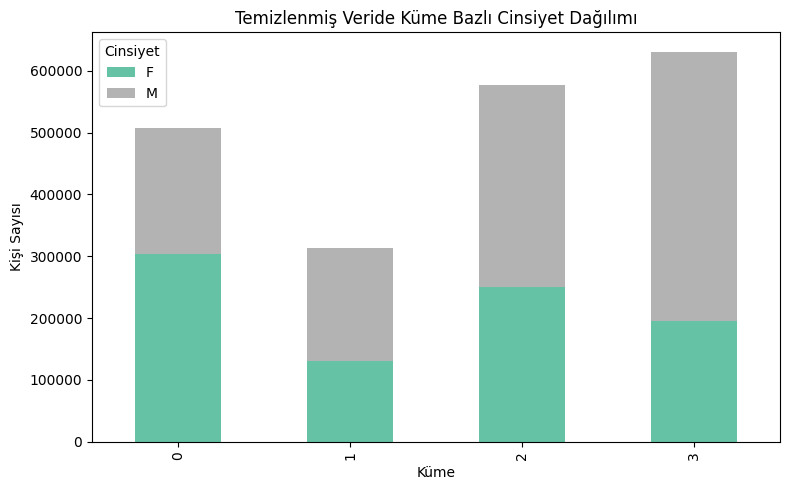

In [46]:
# Küme İstatistikleri: Temizlenmiş Veri
cluster_summary_cleaned = df_cleaned.groupby('cluster')[['Age', 'Finish']].agg(['mean', 'median', 'count']).round(2)
print("\n📊 Temizlenmiş Veri Küme İstatistikleri:\n", cluster_summary_cleaned)

# Cinsiyet Dağılımı: Temizlenmiş Veri
gender_dist_cleaned = df_cleaned.groupby(['cluster', 'Gender']).size().unstack()
print("\n📊 Temizlenmiş Veride Her Kümenin Cinsiyet Dağılımı:\n", gender_dist_cleaned)

# Cinsiyet Dağılımı Grafiği: Temizlenmiş Veri
gender_dist_cleaned.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title("Temizlenmiş Veride Küme Bazlı Cinsiyet Dağılımı")
plt.xlabel("Küme")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Cinsiyet")
plt.tight_layout()
plt.show()

## 6.3 Winsorized Veri ile Kümeleme

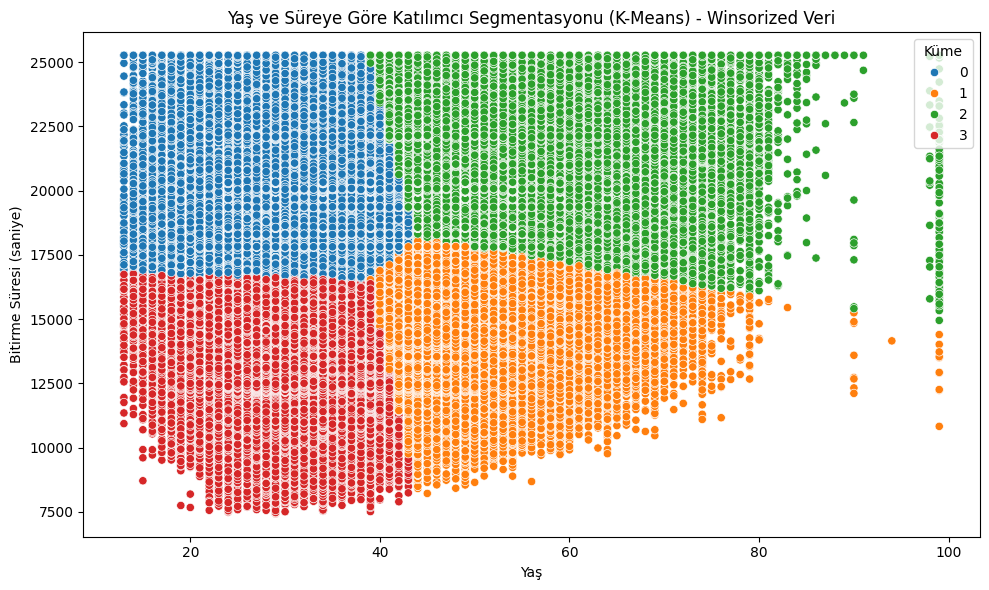

In [47]:
# Winsorized Veriyi Seçme ve Ölçeklendirme
X_cluster_winsorized = df_winsorized[['Age', 'Finish']].copy()
X_scaled_winsorized = scaler.fit_transform(X_cluster_winsorized)

# K-Means Modeli ve Kümeleme
kmeans_winsorized = KMeans(n_clusters=4, random_state=42)
df_winsorized = df_winsorized.copy()  # .copy() kullanarak bir kopya alıyoruz
df_winsorized['cluster'] = kmeans_winsorized.fit_predict(X_scaled_winsorized)

# Görselleştirme: Winsorized Veri Kümeleme Sonuçları
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_winsorized, x='Age', y='Finish', hue='cluster', palette='tab10')
plt.title("Yaş ve Süreye Göre Katılımcı Segmentasyonu (K-Means) - Winsorized Veri")
plt.xlabel("Yaş")
plt.ylabel("Bitirme Süresi (saniye)")
plt.legend(title='Küme', loc='upper right')
plt.tight_layout()
plt.show()


📊 Winsorized Veri Küme İstatistikleri:
            Age                   Finish                 
          mean median   count      mean   median   count
cluster                                                 
0        32.29   33.0  501988  19288.42  18772.0  501988
1        48.64   48.0  579752  14856.54  14984.0  579752
2        52.71   51.0  303395  20617.68  20182.0  303395
3        31.66   32.0  668231  13955.23  14154.0  668231

📊 Winsorized Veride Her Kümenin Cinsiyet Dağılımı:
 Gender        F       M
cluster                
0        301364  200624
1        179294  400458
2        145025  158370
3        269925  398306


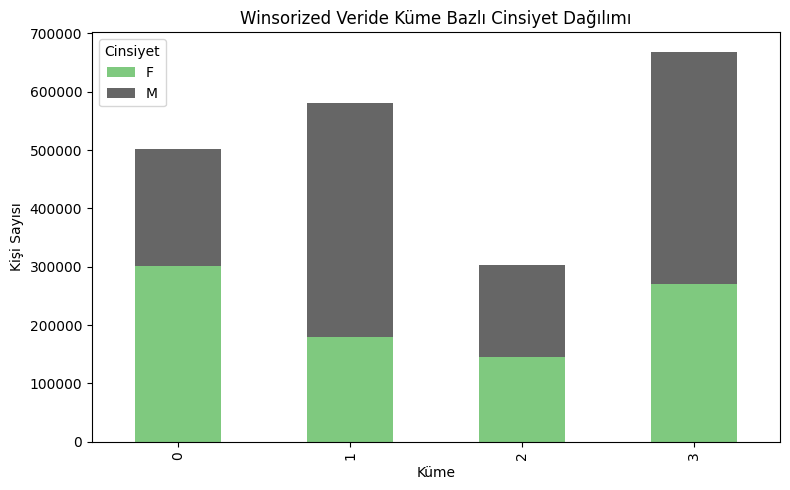

In [48]:
# Küme İstatistikleri: Winsorized Veri
cluster_summary_winsorized = df_winsorized.groupby('cluster')[['Age', 'Finish']].agg(['mean', 'median', 'count']).round(2)
print("\n📊 Winsorized Veri Küme İstatistikleri:\n", cluster_summary_winsorized)

# Cinsiyet Dağılımı: Winsorized Veri
gender_dist_winsorized = df_winsorized.groupby(['cluster', 'Gender']).size().unstack()
print("\n📊 Winsorized Veride Her Kümenin Cinsiyet Dağılımı:\n", gender_dist_winsorized)

# Cinsiyet Dağılımı Grafiği: Winsorized Veri
gender_dist_winsorized.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Accent')
plt.title("Winsorized Veride Küme Bazlı Cinsiyet Dağılımı")
plt.xlabel("Küme")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Cinsiyet")
plt.tight_layout()
plt.show()

## 6.4 Kümeleme Sonrası Yarış Dağılımı

In [49]:
# Kümeleme Sonrası Yarış Dağılımı
race_cluster_summary = df.groupby(['cluster', 'Race']).size().unstack().head(10)
print("\n📊 Kümeleme Sonrası Yarışlara Göre Küme Analizi:\n", race_cluster_summary.T)



📊 Kümeleme Sonrası Yarışlara Göre Küme Analizi:
 cluster                    0     1     2     3
Race                                          
Air Force Marathon      6887  5020  5289  5225
Akron Marathon          3080  1648  4179  4165
Atlanta Marathon         807   347   855  1077
Atlantic City Marathon  1413  1011  2217  2095
Baltimore Marathon      6901  3250  6277  9675
...                      ...   ...   ...   ...
Two Cities Marathon      299   181   421   440
VENTURA MARATHON         896   651  1813  1802
Via Marathon             663   589  3299  3128
WhistleStop Marathon     216    54   217   704
Wineglass Marathon      2777  2023  6733  5591

[96 rows x 4 columns]


## 6.5 Zaman Serisi Analizi ile Küme Dağılımı

In [50]:
# Zaman serisi analizi 
time_cluster_analysis = df.groupby(['Year', 'cluster']).size().unstack()
print("\n📊 Zaman İçindeki Küme Dağılımı:\n", time_cluster_analysis)


📊 Zaman İçindeki Küme Dağılımı:
 cluster      0      1      2      3
Year                               
2010     50934  26217  61030  68724
2011     54613  27047  61644  72956
2012     44166  20966  50174  63581
2013     54489  29710  72596  78481
2014     53046  31680  68913  70877
2015     51712  33364  64258  62903
2016     48533  32829  59641  60633
2017     46791  34735  57024  55566
2018     43484  31603  57385  59266
2019     41212  31669  58426  60488


# 6.6. Küme Bazında Varyans ve Performans Analizi

In [51]:
# Her bir küme için varyansın açıklanma oranı
cluster_variance = df.groupby('cluster').agg({'Finish': 'var'}).round(2)
print(f"\n📊 Küme Başına Varyans Dağılımı:\n", cluster_variance)


📊 Küme Başına Varyans Dağılımı:
              Finish
cluster            
0        4744682.28
1        6379735.55
2        3089766.66
3        3015610.25


In [52]:
# Küme Performans Karşılaştırması: Küme bazında performans analizi
def compare_cluster_performance(df):
    cluster_performance = df.groupby('cluster')['Finish'].agg(['mean', 'std', 'min', 'max'])
    print(f"📊 Küme Bazında Performans Karşılaştırması:\n", cluster_performance)

compare_cluster_performance(df)


📊 Küme Bazında Performans Karşılaştırması:
                  mean          std    min    max
cluster                                         
0        19433.748630  2178.229161  16586  48485
1        20657.312938  2525.813839  13723  73460
2        14879.029999  1757.773211   8217  18311
3        13969.084520  1736.551251   7425  17054


# 6.7. Grup Bazlı Hedef Belirleme

### Grup Bazlı Hedef Belirleme (Kümelere Göre)
Her kümenin ortalama süresi üzerinden koşucuya özel hedef önerebilirsin

In [53]:
# Her küme için ortalama bitirme süresini hesapla
cluster_means = df_cleaned.groupby('cluster')['Finish'].mean()

def suggest_cluster_goal(df, runner_id):
    runner = df.iloc[runner_id]
    cluster = runner['cluster']
    current_time = runner['Finish']
    target_time = cluster_means[cluster] * 0.95  # Örneğin %5 gelişim hedefi

    print(f"Koşucu {runner_id} (Küme {cluster}):")
    print(f"Mevcut süresi: {current_time:.2f} saniye")
    print(f"Küme ortalaması: {cluster_means[cluster]:.2f} saniye")
    print(f"Yeni hedef süresi (%5 daha iyi): {target_time:.2f} saniye")
    
    if current_time > target_time:
        print(f"⏱ Gelişmek için {current_time - target_time:.2f} saniye iyileştirme gerekiyor.")
    else:
        print("🎉 Bu hedefi zaten geçtiniz!")

## Örnek Veri ve Kullanım

In [54]:
# Örnek kullanım
suggest_cluster_goal(df_cleaned, 150000)

Koşucu 150000 (Küme 1):
Mevcut süresi: 20420.00 saniye
Küme ortalaması: 19364.20 saniye
Yeni hedef süresi (%5 daha iyi): 18395.99 saniye
⏱ Gelişmek için 2024.01 saniye iyileştirme gerekiyor.
